In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## Gathering Data

In [ ]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [ ]:
ims = search_images_ddg("packstation")
len(ims)

200

In [ ]:
dest = 'images/packstation.jpg'
download_url(ims[0], dest)

Path('images/packstation.jpg')

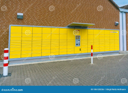

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
ps_types = 'dreckig','sauber'
path = Path('packstations_4')

In [ ]:
if not path.exists():
  path.mkdir()

dest = (path/'sauber')

dest.mkdir(exist_ok=True)
results = search_images_ddg('dhl packstation', max_images=50)
download_images(dest, urls=results)

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in ps_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_ddg(f'{o} packstation')
#         download_images(dest, urls=results)

In [ ]:
fns = get_image_files(path)
fns

(#62) [Path('packstations_4/dreckig/imago0238673336s.jpg'),Path('packstations_4/dreckig/packstation.jpg'),Path('packstations_4/dreckig/images (1).jpg'),Path('packstations_4/dreckig/EQKNIBwU8AAcBoF.jpg'),Path('packstations_4/dreckig/images.jpg'),Path('packstations_4/dreckig/Screenshot 2023-07-18 221855.jpg'),Path('packstations_4/dreckig/hugo-176602710-385.jpg'),Path('packstations_4/dreckig/Screenshot 2023-07-18 221930.jpg'),Path('packstations_4/dreckig/dhl-self-service-paket-drop-off-schliessfacher-bedeckt-graffiti-in-berlin-deutschland-h6kw5n (1).jpg'),Path('packstations_4/dreckig/dhl-self-service-paket-drop-off-schliessfacher-bedeckt-graffiti-in-berlin-deutschland-h6kw5n.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

## From Data to DataLoaders

In [ ]:
stations = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.4, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = stations.dataloaders(path, bs=8)

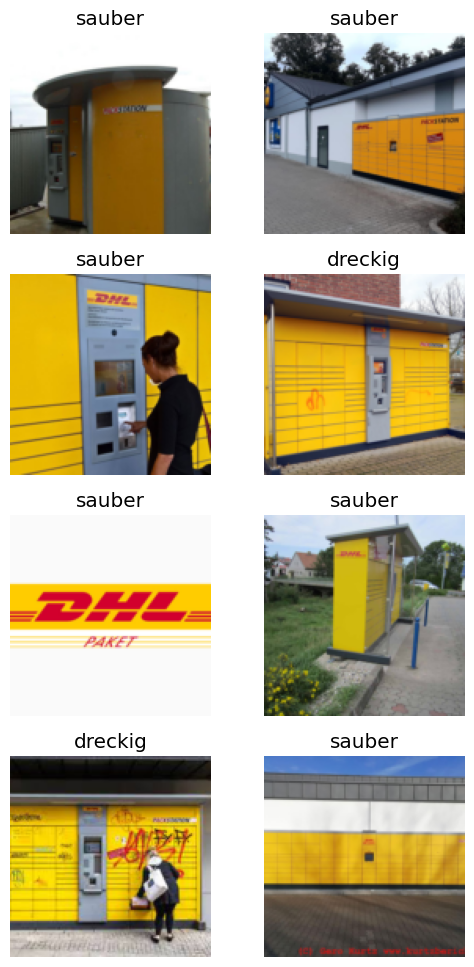

In [ ]:
dls.valid.show_batch(max_n=16, nrows=4)

### Data Augmentation and Training

In [ ]:
stations = stations.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = stations.dataloaders(path, bs=5)

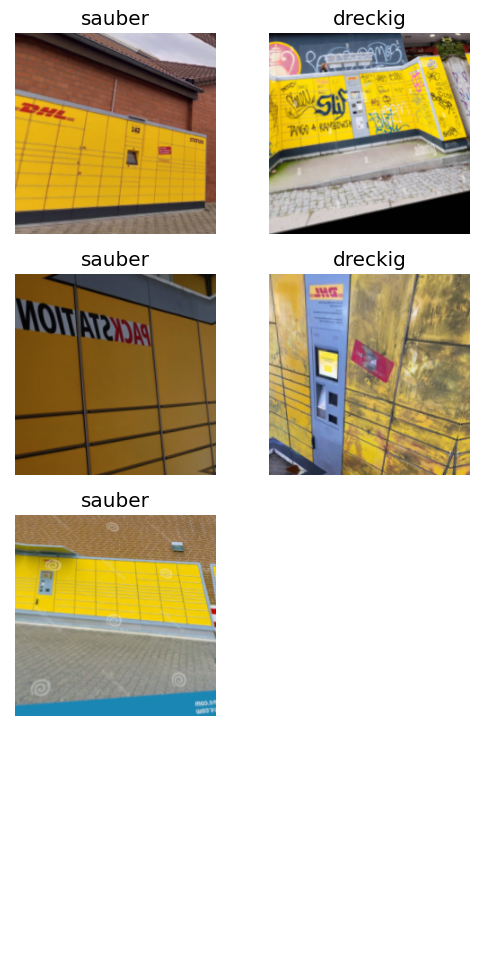

In [ ]:
dls.train.show_batch(max_n=16, nrows=4)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 21.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.895625,1.999379,0.666667,00:06


epoch,train_loss,valid_loss,error_rate,time
0,1.150026,1.139089,0.541667,00:02
1,0.993621,0.901061,0.416667,00:02
2,0.829592,1.071601,0.375000,00:02
3,0.780345,0.956703,0.375000,00:02
4,0.716236,0.804006,0.333333,00:03
5,0.741829,0.612813,0.333333,00:02
6,0.688834,0.618655,0.291667,00:02
7,0.662710,0.559510,0.250000,00:02
8,0.649690,0.497799,0.208333,00:02
9,0.610149,0.501198,0.208333,00:02


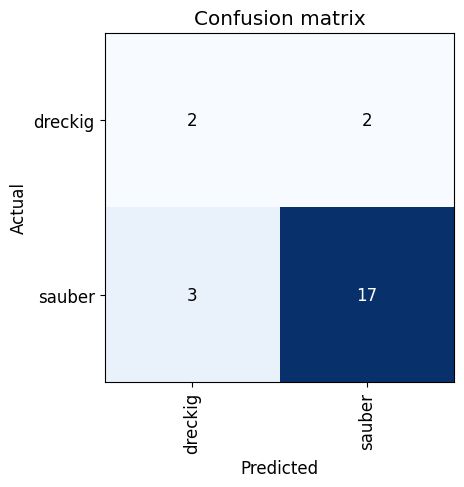

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

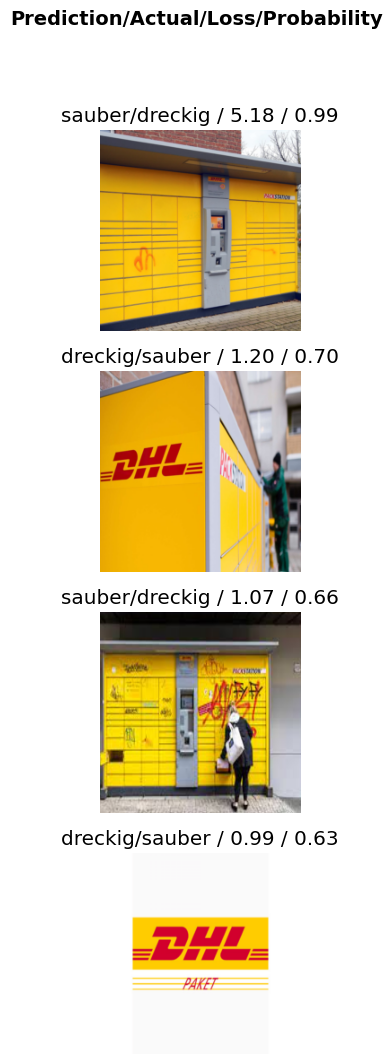

In [ ]:
interp.plot_top_losses(4, nrows=4)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### Using the Model for Inference

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab